### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


### Reading Dataset File

In [2]:
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [4]:
df_short = df.copy()
df_short = df_short.drop(['authors'], axis=1)
df_short = df_short.drop(['date'], axis=1)
df_short = df_short.drop(['link'], axis=1)
df_short = df_short.drop(['short_description'], axis=1)
df_short.head()

,category,headline
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


In [ ]:
df.shape

In [ ]:
df.iat[0,3]

In [5]:
df_new= df.iloc[:10000]

In [7]:
category_list= df.category.unique()
print(category_list)
print(len(category_list))

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']
41


In [6]:
category_list= df_new.category.unique()
print(category_list)
print(len(category_list))

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING']
26


### Text Preprocessing

In [9]:
df_new['headline'].dropna(inplace=True)
#removing numbers from string
df_new['headline'] = df_new['headline'].str.replace('\d+', '')

df_new['headline'] = [entry.lower() for entry in df_new['headline']]
#df['headline']= [word_tokenize(entry) for entry in df['headline']]
df_new.head()

C:\Users\fjann\Anaconda3\lib\site-packages\pandas\core\series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)
C:\Users\fjann\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fjann\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,"there were mass shootings in texas last week,...",https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,will smith joins diplo and nicky jam for the ...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,hugh grant marries for the first time at age,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,jim carrey blasts 'castrato' adam schiff and d...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,julianna margulies uses donald trump poop bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [10]:
# Lemmatize with POS Tag
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]

#sentence = "The striped bats were hanging on their feet and ate best fishes"
#print(lemmatize_text(sentence))

df_new2=df_new.copy()
df_new2['headline'] = [lemmatize_text(entry) for entry in df_new2['headline']]
df_new2.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,"[there, be, mass, shooting, in, texas, last, w...",https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,"[will, smith, join, diplo, and, nicky, jam, fo...",https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,"[hugh, grant, marries, for, the, first, time, ...",https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,"[jim, carrey, blast, 'castrato, ', adam, schif...",https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,"[julianna, margulies, us, donald, trump, poop,...",https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [11]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['headline']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)
df_new3=df_new2.copy()
df_new3['headline'] = df_new3.apply(remove_stops, axis=1)
df_new3.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,"[mass, shooting, texas, last, week, ,, tv]",https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,"[smith, join, diplo, nicky, jam, world, cup, '...",https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,"[hugh, grant, marries, first, time, age]",https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,"[jim, carrey, blast, 'castrato, ', adam, schif...",https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,"[julianna, margulies, us, donald, trump, poop,...",https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [12]:
df_sim = df_new3.copy()
df_sim = df_sim.drop(['authors'], axis=1)
df_sim = df_sim.drop(['date'], axis=1)
df_sim = df_sim.drop(['link'], axis=1)
df_sim = df_sim.drop(['short_description'], axis=1)
df_sim['headline'] = df_sim['headline'].apply(', '.join)
df_sim.head()

,category,headline
0,CRIME,"mass, shooting, texas, last, week, ,, tv"
1,ENTERTAINMENT,"smith, join, diplo, nicky, jam, world, cup, 's..."
2,ENTERTAINMENT,"hugh, grant, marries, first, time, age"
3,ENTERTAINMENT,"jim, carrey, blast, 'castrato, ', adam, schiff..."
4,ENTERTAINMENT,"julianna, margulies, us, donald, trump, poop, ..."


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_sim['headline'],df_sim['category'], test_size=0.33, random_state=42)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [14]:
y_test[0]

11

In [15]:
word_vector_tfidf = TfidfVectorizer(max_features=6000)
word_vector_tfidf.fit(df_sim['headline'])
X_train_v = word_vector_tfidf.transform(X_train)
X_test_v = word_vector_tfidf.transform(X_test)

### 1.1) Naive Bayes

In [16]:
Algo_naive = naive_bayes.MultinomialNB()
Algo_naive.fit(X_train_v,y_train)

y_predict = Algo_naive.predict(X_test_v)

print("Naive Bayes Accuracy = ",accuracy_score(y_predict, y_test)*100)

Naive Bayes Accuracy =  53.090909090909086


### 1.2) Random Forest Classifier





In [17]:
clf_RF = RandomForestClassifier(n_estimators=10)
clf_RF.fit(X_train_v,y_train)
y_predict = clf_RF.predict(X_test_v)

print("Random Forest Classifier Accuracy = ",accuracy_score(y_predict, y_test)*100)

Random Forest Classifier Accuracy =  59.72727272727273


### 1.3) MLP

In [21]:
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(solver='sgd', alpha=0.1, hidden_layer_sizes=(100, 20), random_state=1)
nn_clf.fit(X_train_v, y_train)
y_pred = nn_clf.predict(X_test_v)
print("Neural Network Classifier Accuracy = ",accuracy_score(y_pred, y_test)*100)

Neural Network Classifier Accuracy =  36.18181818181818


C:\Users\fjann\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 1.4) CNN

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_sim['headline'],df_sim['category'], test_size=0.33, random_state=42)
print(X_test[0])


mass, shooting, texas, last, week, ,, tv


In [15]:
df_sim.shape

(10000, 2)

In [58]:
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer

num_classes=26
max_words = 6000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
 
X_train = tokenizer.texts_to_matrix(X_train, mode='tfidf')
X_test = tokenizer.texts_to_matrix(X_test, mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

### CNN

In [59]:
max_words =6000
num_classes = 26
batch_size = 100

model = Sequential()
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 


In [61]:
model.fit(X_train, y_train, batch_size = batch_size, validation_split=0.4, epochs = 10)

Train on 4020 samples, validate on 2680 samples
Epoch 1/10
4020/4020 [==============================] - 5s 1ms/step - loss: 0.1048 - acc: 0.9878 - val_loss: 1.6119 - val_acc: 0.6425
Epoch 2/10
4020/4020 [==============================] - 7s 2ms/step - loss: 0.0330 - acc: 0.9970 - val_loss: 1.7475 - val_acc: 0.6410
Epoch 3/10
4020/4020 [==============================] - 5s 1ms/step - loss: 0.0149 - acc: 0.9985 - val_loss: 1.7560 - val_acc: 0.6414
Epoch 4/10
4020/4020 [==============================] - 4s 1ms/step - loss: 0.0078 - acc: 0.9995 - val_loss: 1.8155 - val_acc: 0.6381
Epoch 5/10
4020/4020 [==============================] - 4s 1ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 1.8585 - val_acc: 0.6410s: 0.0
Epoch 6/10
4020/4020 [==============================] - 5s 1ms/step - loss: 0.0042 - acc: 0.9995 - val_loss: 1.9765 - val_acc: 0.6343
Epoch 7/10
4020/4020 [==============================] - 4s 1ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.8824 - val_acc: 0.6388
Epoch 8/

In [62]:
score = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=1)
 
print('Test accuracy:', score[1])

3300/3300 [==============================] - 1s 450us/step
Test accuracy: 0.6424242438692035


### CNN LSTM

### Performance Comparison

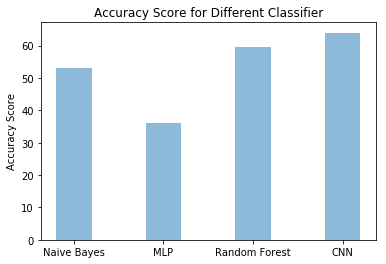

In [64]:
model_list = ['Naive Bayes', 'MLP', 'Random Forest','CNN']
y_pos = np.arange(0, 4)
x_rate = [53.09, 36.18, 59.72, 64]  
plt.bar(y_pos, x_rate,  alpha=0.5, width=0.4)
plt.xticks(y_pos, model_list)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Classifier') 
plt.show()